In [1]:
import pandas as pd
import csv
df_business = pd.read_csv("C:/desktop/ml-project/res_city/illinois/illinois.csv")
df_review = pd.read_csv("C:/desktop/ml-project/res_city/illinois/il_review.csv")
df_user = pd.read_csv("C:/desktop/ml-project/res_city/illinois/il_user.csv")

In [112]:
df_business.columns

Index([u'neighborhood', u'business_id', u'hours', u'is_open', u'address', u'attributes', u'categories', u'city', u'review_count', u'name', u'longitude', u'state', u'stars', u'latitude', u'postal_code', u'type'], dtype='object')

In [117]:
df_business = df_business.sort('business_id')

C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [118]:
df_business.index = range(len(df_business))

In [114]:
df_review.columns

Index([u'Unnamed: 0', u'funny', u'user_id', u'review_id', u'text', u'business_id', u'stars', u'date', u'useful', u'type', u'cool'], dtype='object')

In [115]:
df_user.columns

Index([u'Unnamed: 0', u'yelping_since', u'useful', u'compliment_photos', u'compliment_list', u'compliment_funny', u'compliment_plain', u'review_count', u'elite', u'fans', u'type', u'compliment_note', u'funny', u'compliment_writer', u'compliment_cute', u'average_stars', u'user_id', u'compliment_more', u'friends', u'compliment_hot', u'cool', u'name', u'compliment_profile', u'compliment_cool'], dtype='object')

In [116]:
df_user.user_id.unique()

array(['hAOPSgq9jZ-DiDlOXIpm9g', 'JK8GENrrfXC9PpqspioNeQ',
       'pFRE2mNCQvx9DUU542c6Dw', ..., '38s-iHkVxpLKL7D-Bo25uQ',
       'ShcyA_bTtqudK4eaSbtLGA', 'Qez2Cq92gDq-FepFr1VQKg'], dtype=object)

In [2]:
data = pd.merge(df_business, df_review, on = 'business_id', how = 'inner')

In [3]:
len(data)

18953

In [4]:
newdata = pd.merge(data, df_user, on = 'user_id', how = 'inner')

In [5]:
len(newdata)

240553

In [6]:
newdata.columns

Index([u'neighborhood', u'business_id', u'hours', u'is_open', u'address',
       u'attributes', u'categories', u'city', u'review_count_x', u'name_x',
       u'longitude', u'state', u'stars_x', u'latitude', u'postal_code',
       u'type_x', u'Unnamed: 0_x', u'funny_x', u'user_id', u'review_id',
       u'text', u'stars_y', u'date', u'useful_x', u'type_y', u'cool_x',
       u'Unnamed: 0_y', u'yelping_since', u'useful_y', u'compliment_photos',
       u'compliment_list', u'compliment_funny', u'compliment_plain',
       u'review_count_y', u'elite', u'fans', u'type', u'compliment_note',
       u'funny_y', u'compliment_writer', u'compliment_cute', u'average_stars',
       u'compliment_more', u'friends', u'compliment_hot', u'cool_y', u'name_y',
       u'compliment_profile', u'compliment_cool'],
      dtype='object')

In [8]:
joinedFrames= newdata[['business_id', 'name_x', 'review_count_x', 'stars_x', 'user_id', 'name_y', 'review_count_y', 'stars_y', 'city', 'average_stars','review_count_y', 'review_id']]

In [9]:
joinedFrames.columns

Index([u'business_id', u'name_x', u'review_count_x', u'stars_x', u'user_id',
       u'name_y', u'review_count_y', u'stars_y', u'city', u'average_stars',
       u'review_count_y', u'review_id'],
      dtype='object')

In [10]:
new_columns = joinedFrames.columns.values
new_columns[1] = 'biz_name'
new_columns[2] = 'business_review_count'
new_columns[3] = 'business_average'
new_columns[5] = 'user_name'
new_columns[6] = 'user_review_count'
new_columns[7] = 'stars'
new_columns[9] = 'user_avg'
new_columns[10] ='del'
joinedFrames.columns = new_columns
joinedFrames = joinedFrames.drop('del', 1)

In [11]:
joinedFrames.head(5)

,business_id,biz_name,business_review_count,business_average,user_id,user_name,user_review_count,stars,city,user_avg,review_id
0,rQX6RVr6E4Zg9hx8GBFGHQ,TGI Friday's,15,3.0,hAOPSgq9jZ-DiDlOXIpm9g,Lauren,95.0,1.0,Champaign,3.43,XHQCZsTKRUsVc6cGmoWaLA
1,rQX6RVr6E4Zg9hx8GBFGHQ,TGI Friday's,15,3.0,hAOPSgq9jZ-DiDlOXIpm9g,Lauren,95.0,1.0,Champaign,3.43,XHQCZsTKRUsVc6cGmoWaLA
2,rQX6RVr6E4Zg9hx8GBFGHQ,TGI Friday's,15,3.0,hAOPSgq9jZ-DiDlOXIpm9g,Lauren,95.0,1.0,Champaign,3.43,XHQCZsTKRUsVc6cGmoWaLA
3,rQX6RVr6E4Zg9hx8GBFGHQ,TGI Friday's,15,3.0,hAOPSgq9jZ-DiDlOXIpm9g,Lauren,95.0,1.0,Champaign,3.43,XHQCZsTKRUsVc6cGmoWaLA
4,rQX6RVr6E4Zg9hx8GBFGHQ,TGI Friday's,15,3.0,hAOPSgq9jZ-DiDlOXIpm9g,Lauren,95.0,1.0,Champaign,3.43,XHQCZsTKRUsVc6cGmoWaLA


In [15]:
joinedFrames.city.unique().shape[0]

15L

In [16]:
len(joinedFrames)

240553

In [17]:
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

C:\Users\Harika Konagala\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [18]:
print "Number of Reviews",joinedFrames.shape[0]
print "Number of Users", joinedFrames.user_id.unique().shape[0], "Number of Businesses", joinedFrames.business_id.unique().shape[0]


Number of Reviews 240553
Number of Users 7019 Number of Businesses 560


In [19]:
def recompute_frame(ldf):
    """
    takes a dataframe ldf, makes a copy of it, and returns the copy
    with all averages and review counts recomputed
    this is used when a frame is subsetted.
    """
    ldfu=ldf.groupby('user_id')
    ldfb=ldf.groupby('business_id')
    user_avg=ldfu.stars.mean()
    user_review_count=ldfu.review_id.count()
    business_avg=ldfb.stars.mean()
    business_review_count=ldfb.review_id.count()
    nldf=ldf.copy()
    nldf.set_index(['business_id'], inplace=True)
    nldf['business_avg']=business_avg
    nldf['business_review_count']=business_review_count
    nldf.reset_index(inplace=True)
    nldf.set_index(['user_id'], inplace=True)
    nldf['user_avg']=user_avg
    nldf['user_review_count']=user_review_count
    nldf.reset_index(inplace=True)
    return nldf

In [26]:
smallidf = joinedFrames[(joinedFrames.user_review_count > 50) & (joinedFrames.business_review_count > 50)]
smalldf=recompute_frame(smallidf)

In [27]:
print "Total Number of Reviews", smalldf.shape[0]
print "Users in this set", smalldf.user_id.unique().shape[0], "Restaurants",smalldf.business_id.unique().shape[0]

Total Number of Reviews 93120
Users in this set 972 Restaurants 102


Mean support is: 4.82003494467


(array([  3.54100000e+03,   1.14600000e+03,   3.23000000e+02,
          9.30000000e+01,   2.60000000e+01,   1.30000000e+01,
          5.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ]),
 <a list of 10 Patch objects>)

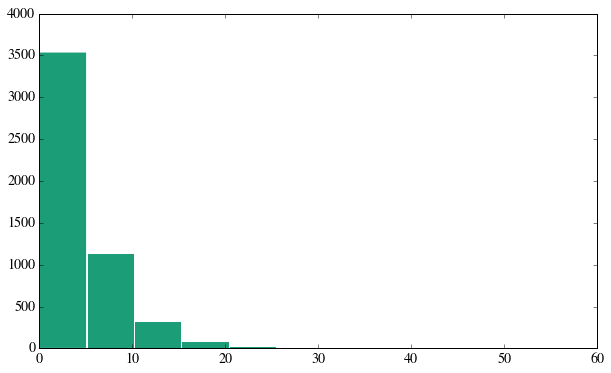

In [28]:
restaurants=smalldf.business_id.unique()
supports=[]
for i,rest1 in enumerate(restaurants):
    for j,rest2 in enumerate(restaurants):
        if  i < j:
            rest1_reviewers = smalldf[smalldf.business_id==rest1].user_id.unique()
            rest2_reviewers = smalldf[smalldf.business_id==rest2].user_id.unique()
            common_reviewers = set(rest1_reviewers).intersection(rest2_reviewers)
            supports.append(len(common_reviewers))
print "Mean support is:",np.mean(supports)
plt.hist(supports)

In [29]:
from scipy.stats.stats import pearsonr
def pearson_sim(rest1_reviews, rest2_reviews, n_common):
    """
    Given a subframe of restaurant 1 reviews and a subframe of restaurant 2 reviews,
    where the reviewers are those who have reviewed both restaurants, return 
    the pearson correlation coefficient between the user average subtracted ratings.
    The case for zero common reviewers is handled separately. Its
    ok to return a NaN if any of the individual variances are 0.
    """
    if n_common==0:
        rho=0.
    else:
        diff1=rest1_reviews['stars']-rest1_reviews['user_avg']
        diff2=rest2_reviews['stars']-rest2_reviews['user_avg']
        rho=pearsonr(diff1, diff2)[0]
    return rho

In [30]:
def get_restaurant_reviews(restaurant_id, df, set_of_users):
    """
    given a resturant id and a set of reviewers, return the sub-dataframe of their
    reviews.
    """
    mask = (df.user_id.isin(set_of_users)) & (df.business_id==restaurant_id)
    reviews = df[mask]
    reviews = reviews[reviews.user_id.duplicated()==False]
    return reviews

In [31]:
def calculate_similarity(rest1, rest2, df, similarity_func):
    # find common reviewers
    rest1_reviewers = df[df.business_id==rest1].user_id.unique()
    rest2_reviewers = df[df.business_id==rest2].user_id.unique()
    common_reviewers = set(rest1_reviewers).intersection(rest2_reviewers)
    n_common=len(common_reviewers)
    #get reviews
    rest1_reviews = get_restaurant_reviews(rest1, df, common_reviewers)
    rest2_reviews = get_restaurant_reviews(rest2, df, common_reviewers)
    sim=similarity_func(rest1_reviews, rest2_reviews, n_common)
    if np.isnan(sim):
        return 0, n_common
    return sim, n_common

In [32]:
class Database:
    "A class representing a database of similaries and common supports"
    
    def __init__(self, df):
        "the constructor, takes a reviews dataframe like smalldf as its argument"
        database={}
        self.df=df
        self.uniquebizids={v:k for (k,v) in enumerate(df.business_id.unique())}
        keys=self.uniquebizids.keys()
        l_keys=len(keys)
        self.database_sim=np.zeros([l_keys,l_keys])
        self.database_sup=np.zeros([l_keys, l_keys], dtype=np.int)
        
    def populate_by_calculating(self, similarity_func):
        """
        a populator for every pair of businesses in df. takes similarity_func like
        pearson_sim as argument
        """
        items=self.uniquebizids.items()
        for b1, i1 in items:
            for b2, i2 in items:
                if i1 < i2:
                    sim, nsup=calculate_similarity(b1, b2, self.df, similarity_func)
                    self.database_sim[i1][i2]=sim
                    self.database_sim[i2][i1]=sim
                    self.database_sup[i1][i2]=nsup
                    self.database_sup[i2][i1]=nsup
                elif i1==i2:
                    nsup=self.df[self.df.business_id==b1].user_id.count()
                    self.database_sim[i1][i1]=1.
                    self.database_sup[i1][i1]=nsup
                    

    def get(self, b1, b2):
        "returns a tuple of similarity,common_support given two business ids"
        sim=self.database_sim[self.uniquebizids[b1]][self.uniquebizids[b2]]
        nsup=self.database_sup[self.uniquebizids[b1]][self.uniquebizids[b2]]
        return (sim, nsup)

In [33]:
db=Database(smalldf)
db.populate_by_calculating(pearson_sim)

In [35]:
smalldf.business_id.unique()

array(['gaR5jDvZsOC0RQeY-W1eqQ', 'Gvox18F9QxsSS9qG2O8E-A',
       'wsuzuLD3KV7L8oMinLCI0A', 'X57f6FWZiwI1wOidPPhOrQ',
       'Frbldz6phswVyMNvwherhA', 'ovApUucCKSb9k0lTP2JieQ',
       '9MnbQg7kfb_WgxoV0hXKSQ', 'Ah4i15g8Ow_zphzcpulTxQ',
       'D6SCh4BwNb52wZIqXdS4JQ', '5jXwI9WpDxGDmzmkmE0RTg',
       'XuByFsXXhnKmZ6hxucOj7A', 'kNtToQSP_Y5U8tznLXuCaw',
       'boIILzBqhjWhq4G0BsB5_A', 'lWmDrnqgU6w3gFaJyn_1Uw',
       'miMx3VNOW8qPJC5wEGaIOw', 'UUsS7SrTQQ2AvvpslfrvFA',
       'th4pZ5LkoIIkb1Vmu_m2DA', 'SUktrYdNQD8k2vvkM4OpfA',
       'Ez1U0wMD7Wws2BPAYfW3yQ', 'm3qsb7Xf9Pivg9GAvx-gog',
       '5_cn7M-9swHrFbnqZtYGBQ', 'PmVxbit6HDDsEUS-j9aDfg',
       'qeJnMI5RmyJ2TZvkqvjn6Q', 'kyXEnWKQGWSThY6EcjORuw',
       'RTmIbq33chUSa-etGiF8Lg', 'ODURDhURWmZr6b--O4nt3w',
       '0FrYsoVHheQGoXEQsH2d2Q', '0-WocGTpO3Zm4q1Zzz49Rw',
       'LElQBiDw8HyU_LrbjP8C1A', 'mklo4H47YWK7f18YXTCEoA',
       'L2c-qKZWumCmOCR-dqBLrg', 'CrIWqmuO2uQWwl3z11K_BA',
       'S_9OaE_RBWBIXnUKvxJKsQ', 'NEVA0IYbawceL6kz5v5DAw

In [36]:
smalldf.user_id[20].encode('ascii','ignore')

'hAOPSgq9jZ-DiDlOXIpm9g'

In [37]:
db.get("RTmIbq33chUSa-etGiF8Lg", "yiFcujhdkeDhmXRufMG-lw")

(-0.59852674689187091, 3)

In [38]:
def shrunk_sim(sim, n_common, reg=3.):
    "takes a similarity and shrinks it down by using the regularizer"
    ssim=(n_common*sim)/(n_common+reg)
    return ssim

In [39]:
from operator import itemgetter
def knearest(restaurant_id, set_of_restaurants, dbase, k=7, reg=3.):
    """
    Given a restaurant_id, dataframe, and database, get a sorted list of the
    k most similar restaurants from the entire database.
    """
    similars=[]
    for other_rest_id in set_of_restaurants:
        if other_rest_id!=restaurant_id:
            sim, nc=dbase.get(restaurant_id, other_rest_id)
            ssim=shrunk_sim(sim, nc, reg=reg)
            similars.append((other_rest_id, ssim, nc ))
    similars=sorted(similars, key=itemgetter(1), reverse=True)
    return similars[0:k]

In [44]:
testbizid="CpNMXASiwtJv5eCDf0n63g"
testbizid2="mklo4H47YWK7f18YXTCEoA"
testbizid4="RTmIbq33chUSa-etGiF8Lg"
testbizid5="yiFcujhdkeDhmXRufMG-lw "

In [45]:
def biznamefromid(df, theid):
    return df['biz_name'][df['business_id']==theid].values[0]
def usernamefromid(df, theid):
    return df['user_name'][df['user_id']==theid].values[0]

In [46]:
print testbizid, biznamefromid(smalldf,testbizid)
print testbizid2, biznamefromid(smalldf, testbizid2)
print testbizid4, biznamefromid(smalldf, testbizid4)

CpNMXASiwtJv5eCDf0n63g Alexander's Steakhouse
mklo4H47YWK7f18YXTCEoA Murphy's Pub
RTmIbq33chUSa-etGiF8Lg Bombay Indian Grill


In [47]:
tops=knearest(testbizid, smalldf.business_id.unique(), db, k=7, reg=3.)
print "For ",biznamefromid(smalldf, testbizid), ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops):
    print i,biznamefromid(smalldf,biz_id), "| Sim", sim, "| Support",nc

For  Alexander's Steakhouse , top matches are:
0 Golden Wok | Sim 0.5 | Support 3
1 Silvercreek | Sim 0.475384265506 | Support 3
2 Guido's Bar & Grill | Sim 0.469486330996 | Support 3
3 Thara Thai | Sim 0.465227186511 | Support 4
4 Zorba's Restaurant | Sim 0.4 | Support 2
5 Jupiter's Pizzeria and Billiards | Sim 0.4 | Support 2
6 Golden Harbor Authentic Chinese Cuisine | Sim 0.4 | Support 2


In [48]:
tops2=knearest(testbizid2, smalldf.business_id.unique(), db, k=7, reg=3.)
print "For ",biznamefromid(smalldf, testbizid2), ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops2):
    print i,biznamefromid(smalldf,biz_id), "| Sim", sim, "| Support",nc

For  Murphy's Pub , top matches are:
0 Timpone's | Sim 0.628754794794 | Support 10
1 My Thai | Sim 0.499990923123 | Support 3
2 Sam's Cafe | Sim 0.476647525852 | Support 3
3 Boltini Lounge | Sim 0.469173939898 | Support 10
4 Mas Amigos | Sim 0.466459838545 | Support 3
5 Merry-Ann's Diner | Sim 0.453297629738 | Support 6
6 Li'l Porgy's Bbq | Sim 0.420599718172 | Support 3


In [49]:
tops2=knearest(testbizid4, smalldf.business_id.unique(), db, k=7, reg=3.)
print "For ",biznamefromid(smalldf, testbizid4), ", top matches are:"
for i, (biz_id, sim, nc) in enumerate(tops2):
    print i,biznamefromid(smalldf,biz_id), "| Sim", sim, "| Support",nc

For  Bombay Indian Grill , top matches are:
0 Sam's Cafe | Sim 0.571428571429 | Support 4
1 Big Grove Tavern | Sim 0.571428571429 | Support 4
2 Yellowfin Japanese Restaurant | Sim 0.570784145654 | Support 6
3 Zorba's Restaurant | Sim 0.490921232418 | Support 5
4 Kamakura Japanese Restaurant | Sim 0.451316980093 | Support 10
5 Le Peep Restaurant | Sim 0.421721008463 | Support 5
6 Pekara Bakery and Bistro | Sim 0.416509318262 | Support 6


In [67]:
def get_user_top_choices(user_id, df, numchoices=5):
    "get the sorted top 5 restaurants for a user by the star rating the user gave them"
    udf=df[df.user_id==user_id][['business_id','stars']].sort(['stars'], ascending=False).head(numchoices)
    return udf
testuserid="4ssDCBvb9LC2cMpWxjhpRQ"
testuserid2="AJcwRgdkHtu3kOrEKlXq8A"
testuserid3="mlLP01xi8sRGlA1uPpDlkA"
testuserid4= "cPJZGsyD1onwRMpaUyrCUA"
testuserid5="ZdYHJ-hctaaDeH1CpP7-EA"


In [54]:
smalldf.user_id.unique()

array(['hAOPSgq9jZ-DiDlOXIpm9g', 'pFRE2mNCQvx9DUU542c6Dw',
       'gxRw9c2lvijXBNhKU5i7_g', 'NAFABx0yBkXYtosg_LmyKw',
       'qmjoMFMZdLH69_6eGTGDZw', '59ygiX9-a8B91rb5qvtIgA',
       '-C1axHDk0GJCiaKvsNR3eA', 'emFFLLncRBFGiUJT1n6U_Q',
       'GdqndXu2xA_Kwbqs8MFShA', 'Rdtp3Yam3moqnGIG3td3wA',
       '4ssDCBvb9LC2cMpWxjhpRQ', 'z3WHx5PVY6BglO4d6Uo9Ww',
       'IYJQXv-KtGjxO6ehyET0LQ', 'xN-xoLhTHUFfTS_BMGG0xg',
       'rZEbBGVeMDv0bhP_DnwCjg', 'I5an19AFIRx-pbKUCEgVQw',
       '3L7nHnaeSHSdZXzV_vdvAQ', '01wsBmFLD_BLELpEdGCiwg',
       'VVimjPD7f8O5D1fhy5vSpw', 'QZ_Arlwoj0ghfBvg69rjOw',
       '2-iZ3lifB5gGWcpP6EgCCw', 'pJyV8I6JsKG_iSzPLvb5AA',
       'GxkY7BqazkQu6I9HBDpbqQ', 'nHRFe2uZfrdsUF2yaDoPlQ',
       'pfWK0FcNG4UMhxl6jfR9fQ', 'FRcwtlSeW1TybhS7BemvtQ',
       'G_eZLhf1Kw5WBpMlXHizNQ', 'D7vqQ2D1mmj_1EV1lNXsnQ',
       'JCyFu9PSz5H1BedJ2V3F6g', 'Jiw1kr7W1IbbqL1p_V7d1A',
       'PVyZXgOkVtnU6966FDFhuw', 'a0V843Mv4b34VkRwB_li5Q',
       'CWk7pfnUyI07ow-GtBlt6A', '0eAOgDxOrm8lPv3SxxdsCQ

In [68]:
print "For user", usernamefromid(smalldf,testuserid), "top choices are:" 
bizs=get_user_top_choices(testuserid, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user Paul top choices are:


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


['Courier Cafe',
 'Courier Cafe',
 "Li'l Porgy's Bbq",
 "Li'l Porgy's Bbq",
 "Li'l Porgy's Bbq"]

In [69]:
print "For user", usernamefromid(smalldf,testuserid2), "top choices are:" 
bizs=get_user_top_choices(testuserid2, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user Sherwin top choices are:


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


['Lai Lai Wok', 'Aroma Cafe', 'Aroma Cafe', 'Aroma Cafe', 'Aroma Cafe']

In [63]:
smalldf.user_name.unique()

array(['Lauren', 'Ashley', 'Sarah', 'Eric', 'Lisa', 'Les', 'Mike',
       'Grimace', 'Seth', 'Rhonda', 'Paul', 'Kelly', 'Rachel', 'Teej',
       'Allison', 'Heather', 'Zachary', 'Daniella', 'A', 'Matthew', 'Tim',
       'B', 'Wayne', 'Abhay', 'April', 'Jamie', 'Pete', 'Grace', 'Christi',
       'Dawn', 'S.', 'Jackie', 'David', 'Paige', 'Bev', 'S', 'Virgil',
       'Kailey', 'John', 'Sherry', 'Macy', 'Mark', 'Bob', 'Aisha', 'Mia',
       'Deanna', 'Nava', 'Travis', 'Steve', 'Ellen', 'The', 'Daniel',
       'Adam', 'Sonny', 'Mona', 'Matthis', 'Susan', 'Natalie', 'Jessica',
       'James', 'Erin', 'Elorie', 'Anne', 'Justine', 'Tj', 'Jeanne',
       'Nelson', 'Sara', 'Sherwin', 'Christina', 'Maxine', 'Allie',
       'Penelope', 'Lucas', 'Lesley', 'Suzanne', 'Wanda', 'Helen', 'T. A.',
       'Edward', 'Ronald', 'Sean', 'Doug', 'Jay', 'Alex', 'Lorelei',
       'Tushar', 'Thomas', 'Alyssa', 'Lori', 'Kristina', 'Ruchi',
       'Adrienne', 'Drake', 'Theresa', 'Casey', 'Schannon', 'Claire',
    

In [60]:
smalldf.columns

Index([u'user_id', u'business_id', u'biz_name', u'business_review_count', u'business_average', u'user_name', u'user_review_count', u'stars', u'city', u'user_avg', u'review_id', u'business_avg'], dtype='object')

In [70]:
print "For user", usernamefromid(smalldf,testuserid5), "top choices are:" 
bizs=get_user_top_choices(testuserid5, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user Colleen top choices are:


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


['Radio Maria', 'Radio Maria', 'Radio Maria', 'Seven Saints', 'Seven Saints']

In [71]:
print "For user", usernamefromid(smalldf,testuserid4), "top choices are:" 
bizs=get_user_top_choices(testuserid4, smalldf)['business_id'].values
[biznamefromid(smalldf, biz_id) for biz_id in bizs]

For user Elaine top choices are:


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


['Miga', "Papa Del's Pizza", 'Silvercreek', 'Silvercreek', 'Silvercreek']

In [66]:
smalldf.loc[smalldf['user_name'] == "Lauren"]

,user_id,business_id,biz_name,business_review_count,business_average,user_name,user_review_count,stars,city,user_avg,review_id,business_avg
0,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
1,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
2,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
3,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
4,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
5,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
6,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
7,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
8,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605
9,hAOPSgq9jZ-DiDlOXIpm9g,gaR5jDvZsOC0RQeY-W1eqQ,Mas Amigos,602,4.0,Lauren,120,5.0,Champaign,4.250000,k6_-Lfo8sRnNUrIrROT8Rg,3.918605


In [72]:
def get_top_recos_for_user(userid, df, dbase, n=5, k=7, reg=3.):
    bizs=get_user_top_choices(userid, df, numchoices=n)['business_id'].values
    rated_by_user=df[df.user_id==userid].business_id.values
    tops=[]
    for ele in bizs:
        t=knearest(ele, df.business_id.unique(), dbase, k=k, reg=reg)
        for e in t:
            if e[0] not in rated_by_user:
                tops.append(e)

    #there might be repeats. unique it
    ids=[e[0] for e in tops]
    uids={k:0 for k in list(set(ids))}

    topsu=[]
    for e in tops:
        if uids[e[0]] == 0:
            topsu.append(e)
            uids[e[0]] =1
    topsr=[]     
    for r, s,nc in topsu:
        avg_rate=df[df.business_id==r].stars.mean()
        topsr.append((r,avg_rate))
        
    topsr=sorted(topsr, key=itemgetter(1), reverse=True)

    if n < len(topsr):
        return topsr[0:n]
    else:
        return topsr

In [73]:
print "For user", usernamefromid(smalldf,testuserid), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Paul the top recommendations are:
El Oasis | Average Rating | 4.58058252427
J Gumbo's | Average Rating | 4.10700636943
Original Pancake House | Average Rating | 4.07134071341
Bombay Indian Grill | Average Rating | 3.79725085911
Siam Terrace | Average Rating | 3.76522248244


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [74]:
print "For user", usernamefromid(smalldf,testuserid2), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid2, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Sherwin the top recommendations are:
Maize Mexican Grill | Average Rating | 4.27157360406
Luna | Average Rating | 3.66873065015
301 Mongolia | Average Rating | 3.62852112676
Sushi Kame | Average Rating | 3.60388349515
Silvercreek | Average Rating | 3.58584807492


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [75]:
print "For user", usernamefromid(smalldf,testuserid3), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid3, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Archana the top recommendations are:
El Oasis | Average Rating | 4.58058252427
Original Pancake House | Average Rating | 4.07134071341
Texas Roadhouse | Average Rating | 3.81723625557
Pizzeria Antica | Average Rating | 3.52487562189
The Ribeye | Average Rating | 3.49376558603


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [76]:
print "For user", usernamefromid(smalldf,testuserid4), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid4, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Elaine the top recommendations are:
Cracked the Egg Came First | Average Rating | 4.3664825046
Mashawi Grill | Average Rating | 4.24171779141
Aroma Cafe | Average Rating | 4.24145785877


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Siam Terrace | Average Rating | 3.76522248244
Jupiter's Pizzeria and Billiards | Average Rating | 3.76426174497


In [77]:
print "For user", usernamefromid(smalldf,testuserid5), "the top recommendations are:"
toprecos=get_top_recos_for_user(testuserid5, smalldf, db, n=5, k=7, reg=3.)
for biz_id, biz_avg in toprecos:
    print biznamefromid(smalldf,biz_id), "| Average Rating |", biz_avg

For user Colleen the top recommendations are:
Texas Roadhouse | Average Rating | 3.81723625557
Pizzeria Antica | Average Rating | 3.52487562189
Sam's Cafe | Average Rating | 3.47421383648
Golden Wok | Average Rating | 3.46637744035
Mandarin Wok | Average Rating | 3.435


C:\Users\Harika Konagala\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [78]:
def knearest_amongst_userrated(restaurant_id, user_id, df, dbase, k=7, reg=3.):
    dfuser=df[df.user_id==user_id]
    bizsuserhasrated=dfuser.business_id.unique()
    return knearest(restaurant_id, bizsuserhasrated, dbase, k=k, reg=reg)


In [79]:
def rating(df, dbase, restaurant_id, user_id, k=7, reg=3.):
    mu=df.stars.mean()
    users_reviews=df[df.user_id==user_id]
    nsum=0.
    scoresum=0.
    nears=knearest_amongst_userrated(restaurant_id, user_id, df, dbase, k=k, reg=reg)
    restaurant_mean=df[df.business_id==restaurant_id].business_avg.values[0]
    user_mean=users_reviews.user_avg.values[0]
    scores=[]
    for r,s,nc in nears:
        scoresum=scoresum+s
        scores.append(s)
        r_reviews_row=users_reviews[users_reviews['business_id']==r]
        r_stars=r_reviews_row.stars.values[0]
        r_avg=r_reviews_row.business_avg.values[0]
        rminusb=(r_stars - (r_avg + user_mean - mu))
        nsum=nsum+s*rminusb
    baseline=(user_mean +restaurant_mean - mu)
    #we might have nears, but there might be no commons, giving us a pearson of 0
    if scoresum > 0.:
        val =  nsum/scoresum + baseline
    else:
        val=baseline
    return val

In [81]:
print "User Average", smalldf[smalldf.user_id==testuserid].stars.mean(),"for",usernamefromid(smalldf,testuserid)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid, k=7, reg=3.),"|","Average",biz_avg

User Average 4.6 for Paul
Predicted ratings for top choices calculated earlier:
Texas Roadhouse | 4.80122465763 | Average 3.81723625557
Pizzeria Antica | 4.50886402395 | Average 3.52487562189
Sam's Cafe | 4.45820223854 | Average 3.47421383648
Golden Wok | 4.45036584241 | Average 3.46637744035
Mandarin Wok | 4.41898840206 | Average 3.435


In [82]:
print "User Average", smalldf[smalldf.user_id==testuserid2].stars.mean(),"for",usernamefromid(smalldf,testuserid2)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid2, k=7, reg=3.),"|","Average",biz_avg

User Average 4.0 for Sherwin
Predicted ratings for top choices calculated earlier:
Texas Roadhouse | 3.73129794807 | Average 3.81723625557
Pizzeria Antica | 4.47436768903 | Average 3.52487562189
Sam's Cafe | 7.72241595248 | Average 3.47421383648
Golden Wok | 4.26166769654 | Average 3.46637744035
Mandarin Wok | 3.95561763592 | Average 3.435


In [83]:
print "User Average", smalldf[smalldf.user_id==testuserid3].stars.mean(),"for",usernamefromid(smalldf,testuserid3)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid3, k=7, reg=3.),"|","Average",biz_avg

User Average 3.0 for Archana
Predicted ratings for top choices calculated earlier:
Texas Roadhouse | 3.23564047156 | Average 3.81723625557
Pizzeria Antica | 2.86433626882 | Average 3.52487562189
Sam's Cafe | 2.74427369695 | Average 3.47421383648
Golden Wok | 3.60400944606 | Average 3.46637744035
Mandarin Wok | 4.29065004389 | Average 3.435


In [84]:
print "User Average", smalldf[smalldf.user_id==testuserid4].stars.mean(),"for",usernamefromid(smalldf,testuserid4)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid4, k=7, reg=3.),"|","Average",biz_avg

User Average 4.8 for Elaine
Predicted ratings for top choices calculated earlier:
Texas Roadhouse | 4.95567102302 | Average 3.81723625557
Pizzeria Antica | 4.70886402395 | Average 3.52487562189
Sam's Cafe | 4.65820223854 | Average 3.47421383648
Golden Wok | 4.65036584241 | Average 3.46637744035
Mandarin Wok | 4.61898840206 | Average 3.435


In [85]:
print "User Average", smalldf[smalldf.user_id==testuserid5].stars.mean(),"for",usernamefromid(smalldf,testuserid5)
print "Predicted ratings for top choices calculated earlier:"
for biz_id,biz_avg in toprecos:
    print biznamefromid(smalldf, biz_id),"|",rating(smalldf, db, biz_id, testuserid5, k=7, reg=3.),"|","Average",biz_avg

User Average 3.5 for Colleen
Predicted ratings for top choices calculated earlier:
Texas Roadhouse | 4.16734925514 | Average 3.81723625557
Pizzeria Antica | 4.29087470079 | Average 3.52487562189
Sam's Cafe | 3.35820223854 | Average 3.47421383648
Golden Wok | 3.85418282477 | Average 3.46637744035
Mandarin Wok | 3.30723996669 | Average 3.435


In [109]:
def get_other_ratings(restaurant_id, user_id, df):
    "get a user's rating for a restaurant and the restaurant's average rating"
    choice=df[(df.business_id==restaurant_id) & (df.user_id==user_id)]
    users_score=choice.stars.values
    average_score=choice.business_avg.values
    return users_score, average_score #index error...

In [110]:
print "for user",usernamefromid(smalldf,testuserid2), 'avg', smalldf[smalldf.user_id==testuserid2].stars.mean() 
for biz_id in bizs:
    print "----------------------------------"
    print biznamefromid(smalldf, biz_id)
    print "Predicted Rating:",rating(smalldf, db, biz_id, testuserid2, k=7, reg=3.) 
    u=get_other_ratings(biz_id, testuserid2, smalldf)
    a=get_other_ratings(biz_id, testuserid2, smalldf)
    print "Actual User Rating:",u
    print "Avg Rating:",a

for user Sherwin avg 4.0
----------------------------------
Miga
Predicted Rating: 4.61031377194
Actual User Rating: (array([], dtype=float64), array([], dtype=float64))
Avg Rating: (array([], dtype=float64), array([], dtype=float64))
----------------------------------
Papa Del's Pizza
Predicted Rating: 3.88175035363
Actual User Rating: (array([], dtype=float64), array([], dtype=float64))
Avg Rating: (array([], dtype=float64), array([], dtype=float64))
----------------------------------
Silvercreek
Predicted Rating: 4.01343284429
Actual User Rating: (array([], dtype=float64), array([], dtype=float64))
Avg Rating: (array([], dtype=float64), array([], dtype=float64))
----------------------------------
Silvercreek
Predicted Rating: 4.01343284429
Actual User Rating: (array([], dtype=float64), array([], dtype=float64))
Avg Rating: (array([], dtype=float64), array([], dtype=float64))
----------------------------------
Silvercreek
Predicted Rating: 4.01343284429
Actual User Rating: (array([],

In [88]:
smalldf.columns

Index([u'user_id', u'business_id', u'biz_name', u'business_review_count', u'business_average', u'user_name', u'user_review_count', u'stars', u'city', u'user_avg', u'review_id', u'business_avg'], dtype='object')

In [111]:
def compare_results(stars_actual, stars_predicted, ylow=-10, yhigh=15, title=""):
    """
    plot predicted results against actual results. Takes 2 arguments: a
    numpy array of actual ratings and a numpy array of predicted ratings
    scatterplots the predictions, a unit slope line, line segments joining the mean,
    and a filled in area of the standard deviations."
    """
    fig=plt.figure()
    df=pd.DataFrame(dict(actual=stars_actual, predicted=stars_predicted))
    ax=plt.scatter(df.actual, df.predicted, marker = '.', alpha=0.2, s=30, label="predicted")
    plt.ylim([ylow,yhigh])
    plt.plot([1,5],[1,5], label="slope 1")
    xp=[1,2,3,4,5]
    yp=df.groupby('actual').predicted.mean().values
    plt.plot(xp,yp,'k', label="means")
    sig=df.groupby('actual').predicted.std().values
    plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)
    plt.xlabel("actual")
    plt.ylabel("predicted")
    plt.legend(frameon=False)
    remove_border()
    plt.grid(False)
    plt.title(title)
    print np.mean(np.abs(df.predicted) < 15)

In [119]:
import scipy
from scipy import sparse
from scipy.sparse import coo_matrix